In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyticsvidhya-identify-the-sentiments/train_2kmZucJ.csv
/kaggle/input/analyticsvidhya-identify-the-sentiments/sample_submission_LnhVWA4.csv
/kaggle/input/analyticsvidhya-identify-the-sentiments/test_oJQbWVk.csv


Sentiment analysis is one of the key use cases that has seen extensive application of natural language processing and sequence modeling. In this assignment, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

Evaluation Metric
The metric used for evaluating the performance of classification model would be weighted F1-Score.

In [2]:
# import standard libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [3]:
pd.set_option('display.max_colwidth',300)

In [4]:
# Read the train and test files and explore the data

train = pd.read_csv('/kaggle/input/analyticsvidhya-identify-the-sentiments/train_2kmZucJ.csv')
test  = pd.read_csv('/kaggle/input/analyticsvidhya-identify-the-sentiments/test_oJQbWVk.csv')

train.shape,test.shape

((7920, 3), (1953, 2))

In [5]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [6]:
train.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [7]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

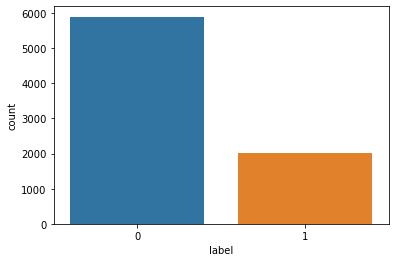

In [8]:
sns.countplot(train.label)

In [9]:
# read the sample tweets /label pair  from train

train.sample(10,random_state=5)[['tweet','label']]

,tweet,label
840,Ok let's go #sony #z1 #paixaodecristo #rec #hdv #equipedelta #eita #aovivo #pacatuba #gravação… http://instagram.com/p/m-R4wsFyqK/,0
3810,"Its sad when u speak to other girls and realise everything his saying to you, has been said to them #waistedtime #Apple",1
7449,With @xlhslb_ccktks Loving myself #picoftheday #me2day #selca #selfie #iphone #hendrizious… https://instagram.com/p/2YIiJiRzkC/,0
1891,I’m Pretty Sure These Orangutans… http://dlvr.it/Lnj2St #news #photography #fashion #health #fail #tech #ipad #iphone #funny #lol,0
7738,Skype com a Prinn linda *-------* #girls #beautiful #skype #iphone #iphonesia #instagood… http://instagram.com/p/bARDkzAkWf/,0
3649,Love zipper screen lock https://goo.gl/nXA2OU #android #apps #beautiful #cute #colors #igers #iphoneonly #cat #iphone,0
2522,Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow 3#3a,0
1168,http://Hotels-live.com #F4F This boy tho! #shoes #friends #life #drinks #hotel #apple #cinnamon... http://fb.me/3WkwQJfA5,0
3840,Been A Min monday #moi #iPhoneX #2017 #MakeUp #JustMe #fabulous #blackgirlmagic… https://www.instagram.com/p/Bd_LZtIFgXJ/,0
6490,Every apple product I have ever owned fucking sucks ass. #Apple,1


In [10]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' — Yes, but wouldn't that block the screen?\n"
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing"
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for


In [11]:
test.dtypes

id        int64
tweet    object
dtype: object

In [12]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

In [13]:
# read the sample tweets from test

test.sample(10,random_state=5).tweet

816                                            I can #die now. =) #thanks #Samsung #837nyc =) #hankrizy @ 837 NYC http://ln.is/www.instagram.com/p/sW0U8 …
735                     Thanks for a new handphone mom :) #gift #samsung #core #yeay #instapict #instashare #instalike… http://instagram.com/p/iv2f-iRssf/
342     Love #Beach #oceanmedallion #OceanOptimism #oceanwaves #Oceans8 https://itunes.apple.com/app/id1131238793 … #Oceanwaves #Nature #IPhone #iPAD #iOS
513                                           Santa is at the Apple Store. http://twitpic.com/3hjnyf Just genius! :D #Apple #Advertising #Santa #Christmas
664                          Got my phone case finally! #iphonesia #iphone4 #skulls #flowers #phonecase #sodope #apple… http://instagram.com/p/d0PssypXXh/
1628                    Hallo talk? #greyhair #hairstyle #morning #samsung #girl #hair #house #picture #horse #sexy #lady #womanpic.twitter.com/b04H0hgxeT
1302                    Keshia Knight-Pulliam Flaunts Her… http://dlvr

In [14]:
# define function to clean the dataset tweets

import string
import re

def _cleanText(text) :
    
    punct = string.punctuation
    
    text = text.lower()
    text = ''.join(t for t in text if t not in punct)
    text = re.sub('$&@*#',' Negative ',text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'[^a-zA-Z]',' ',text)
    text = re.sub('\s+',' ',text)
    
    return text

In [15]:
train['cleaned_tweet'] = train.tweet.apply(lambda x : _cleanText(x))

test['cleaned_tweet'] = test.tweet.apply(lambda x : _cleanText(x))


# read the sample tweets /label pair  from cleaned_tweets now

train.sample(10,random_state=5)[['cleaned_tweet','label']]

,cleaned_tweet,label
840,ok lets go sony z paixaodecristo rec hdv equipedelta eita aovivo pacatuba grava o,0
3810,its sad when u speak to other girls and realise everything his saying to you has been said to them waistedtime apple,1
7449,with xlhslbccktks loving myself picoftheday me day selca selfie iphone hendrizious,0
1891,i m pretty sure these orangutans news photography fashion health fail tech ipad iphone funny lol,0
7738,skype com a prinn linda girls beautiful skype iphone iphonesia instagood,0
3649,love zipper screen lock android apps beautiful cute colors igers iphoneonly cat iphone,0
2522,gain followers rt this must follow me i follow back follow everyone who rts gain iphone sougofollow a,0
1168,f f this boy tho shoes friends life drinks hotel apple cinnamon,0
3840,been a min monday moi iphonex makeup justme fabulous blackgirlmagic,0
6490,every apple product i have ever owned fucking sucks ass apple,1


In [16]:
test.sample(10,random_state=5).cleaned_tweet

816                                                                        i can die now thanks samsung nyc hankrizy nyc 
735                                 thanks for a new handphone mom gift samsung core yeay instapict instashare instalike 
342                           love beach oceanmedallion oceanoptimism oceanwaves oceans oceanwaves nature iphone ipad ios
513                                           santa is at the apple store just genius d apple advertising santa christmas
664                                     got my phone case finally iphonesia iphone skulls flowers phonecase sodope apple 
1628    hallo talk greyhair hairstyle morning samsung girl hair house picture horse sexy lady womanpictwittercomb h hgxet
1302                     keshia knightpulliam flaunts her news photography fashion health fail tech ipad iphone funny lol
957                                              samsung you morons give me update for my gti gs s international galaxys 
1091                    

In [ ]:
# use machine learning techniques  first to extract the sentiments from the text

#  1 try with Count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(encoding ='utf-8',min_df = 5,max_df = 0.9,max_features = 500)

#cvec = CountVectorizer(encoding ='utf-8',max_features = 6000)

X = cvec.fit_transform(train.cleaned_tweet.values)

Xtst = cvec.fit_transform(test.cleaned_tweet.values)

X.toarray().shape,Xtst.toarray().shape

In [ ]:
#  2 try with Tfidf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfvec = TfidfVectorizer(encoding ='utf-8',min_df = 5,max_df = 0.9,max_features = 500)

#cvec = CountVectorizer(encoding ='utf-8',max_features = 6000)

X = tfvec.fit_transform(train.cleaned_tweet.values)

Xtst = tfvec.fit_transform(test.cleaned_tweet.values)

X.toarray().shape,Xtst.toarray().shape

In [ ]:
print(len(tfvec.get_feature_names()))

In [17]:
# returns vector reperesentation of a given word if it is present in vocabulary
def get_embedding_w2v(doc_tokens, pre_trained,model):
    embeddings = []
    # if pre_trained = 1; use Google's model (Glove) else use our own model (Word2Vec)
    if pre_trained:
        model = model
    else:
        model = w2vec
    # iterate over tokens to extract their vectors    
    for tok in doc_tokens:
        if tok in model.wv.vocab:
            embeddings.append(model.wv.word_vec(tok))
    # mean the vectors of individual words to get the vector of the statement
    return np.mean(embeddings, axis=0)

In [20]:
# using Word2Vec approach

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# check the output of simple_preprocess on the first article
#print(simple_preprocess(train.cleaned_tweet[0])[:200])

#sp_tr_tweet = train.cleaned_tweet.apply(lambda x: simple_preprocess(x))
#sp_ts_tweet = test.cleaned_tweet.apply(lambda x: simple_preprocess(x))
sp_cd_tweet = cdf.cleaned_tweet.apply(lambda x : simple_preprocess(x))

#model_tr = Word2Vec(sp_tr_tweet,min_count=5,size = 300,sg=1)
#model_ts = Word2Vec(sp_ts_tweet,min_count=5,size = 300,sg=1)
model_cd = Word2Vec(sp_cd_tweet,min_count=5,size = 300,sg=1)

X_W2Vec = sp_cd_tweet.apply(lambda x :  get_embedding_w2v(x,1,model_cd))
#X_tr_W2Vec = sp_tr_tweet.apply(lambda x :  get_embedding_w2v(x,1,model_tr))
#X_ts_W2Vec = sp_ts_tweet.apply(lambda x :  get_embedding_w2v(x,1,model_ts))

X_W2Vec = pd.DataFrame(X_W2Vec.tolist())
#X_tr_W2Vec = pd.DataFrame(X_tr_W2Vec.tolist())
#X_ts_W2Vec = pd.DataFrame(X_ts_W2Vec.tolist())

print('X shape:', X_W2Vec.shape)
#print('X train shape:', X_tr_W2Vec.shape)
#print('X test shape:',  X_ts_W2Vec.shape)

#words_tr = list(model_tr.wv.vocab)
#words_ts = list(model_ts.wv.vocab)

#X , Xtst = model_tr[model_tr.wv.vocab] , model_ts[model_ts.wv.vocab]

#X.shape, Xtst.shape

X shape: (9873, 300)


In [21]:
len(model_cd.wv.vocab)

2929

In [22]:
X_W2Vec

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.118223,0.069791,0.057193,0.039443,0.187079,-0.160455,-0.102681,-0.377861,0.078829,-0.072745,...,-0.023907,0.011485,-0.015115,0.055343,-0.117229,0.040478,0.264078,-0.231857,0.143486,-0.144009
1,-0.165771,0.118826,0.050851,0.016051,0.047352,-0.128600,-0.068010,-0.196864,0.173614,-0.109367,...,-0.004940,0.115602,-0.080084,-0.132485,-0.158940,0.012785,0.207704,-0.180440,0.090385,-0.191626
2,-0.161133,0.029675,0.087180,-0.019401,0.070052,-0.169542,0.021993,-0.228673,0.138892,-0.058662,...,-0.013007,0.082306,-0.105709,0.036123,-0.155371,-0.003582,0.020697,-0.151523,0.216551,-0.184028
3,-0.186339,0.016510,0.091774,-0.010444,0.091627,-0.132136,0.005725,-0.208030,0.144519,-0.075162,...,0.002406,0.147919,-0.171128,-0.016218,-0.135923,-0.029657,0.033089,-0.183226,0.154802,-0.194998
4,-0.244800,-0.022566,0.139087,-0.054002,0.069798,-0.175161,0.040309,-0.166733,0.129079,-0.106086,...,0.000139,0.113488,-0.216336,0.036901,-0.171985,-0.047342,-0.053951,-0.183408,0.196529,-0.237815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,-0.178832,0.011787,0.095726,-0.026225,0.081411,-0.167646,0.017948,-0.131186,0.134471,-0.133132,...,0.008629,0.136727,-0.144359,-0.016532,-0.156337,-0.043157,0.022960,-0.190802,0.152948,-0.213010
9869,-0.173746,-0.003975,0.102980,0.007122,0.143141,-0.131673,-0.006893,-0.162690,0.109940,-0.095501,...,0.011386,0.176529,-0.159989,-0.046030,-0.087199,-0.041289,0.122883,-0.221126,0.104210,-0.203388
9870,-0.217679,-0.014687,0.112658,-0.044796,0.071072,-0.172297,0.052681,-0.169575,0.130861,-0.091408,...,-0.006865,0.138819,-0.182676,0.022505,-0.158871,-0.034084,-0.039095,-0.189072,0.208426,-0.214885
9871,-0.201065,-0.018808,0.106293,-0.041776,0.052072,-0.188950,0.042558,-0.156829,0.126592,-0.128408,...,-0.020135,0.115749,-0.154591,0.045975,-0.168560,-0.031141,-0.033943,-0.194385,0.207562,-0.227327


In [ ]:
len(model_tr.wv.vocab),len(model_ts.wv.vocab)

In [ ]:
X_tr_W2Vec

In [23]:
X_tr = X_W2Vec[0:7920]
X_ts = X_W2Vec[7920:]
X_tr.shape,X_ts.shape

((7920, 300), (1953, 300))

In [ ]:
print(len(cvec.get_feature_names()))

In [ ]:
# use pretrained model glove

from gensim.models import KeyedVectors
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

# path of the downloaded model
glove_file = '/kaggle/input/glove-840b-300d/glove.840B.300d.txt'
tmp_file = get_tmpfile("test_word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)
# load into gensim
w2vec = KeyedVectors.load_word2vec_format(tmp_file)

X_tr_W2Vec = sp_tr_tweet.apply(lambda x :  get_embedding_w2v(x,0,model_tr))
X_ts_W2Vec = sp_ts_tweet.apply(lambda x :  get_embedding_w2v(x,0,model_ts))

X_tr_W2Vec = pd.DataFrame(X_tr_W2Vec.tolist())
X_ts_W2Vec = pd.DataFrame(X_ts_W2Vec.tolist())

print('X train shape:', X_tr_W2Vec.shape)
print('X test shape:',  X_ts_W2Vec.shape)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_tr_scale = mms.fit_transform(X_tr_W2Vec)
X_ts_scale = mms.fit_transform(X_ts_W2Vec)

In [24]:
# Extract the dependent and independent var and split the data to train and validation
# use naive bayes algorithm to evaluate the model

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


#X    = np.array(X)
y    = train.label.values

X_train,X_val,y_train,y_val = train_test_split(X_tr,y,test_size =0.25,random_state=11,shuffle=True,stratify=y)  # CountVectorizer way
#X_train.shape,X_val.shape,y_train.shape,y_val.shape,Xtst.shape

#X_train,X_val,y_train,y_val = train_test_split(X_tr_scale,y,test_size =0.25,random_state=11,shuffle=True,stratify=y)  # W2Vec and glove
X_train.shape,X_val.shape,y_train.shape,y_val.shape,X_ts.shape

((5940, 300), (1980, 300), (5940,), (1980,), (1953, 300))

In [25]:
X_train,y_train

(           0         1         2         3         4         5         6    \
 4943 -0.180040  0.007806  0.070366 -0.018617  0.036021 -0.190086  0.004935   
 1299 -0.273658 -0.045005  0.171803 -0.069786  0.073223 -0.180980  0.043962   
 7458 -0.144838  0.046323  0.090982  0.012003  0.193021 -0.123436 -0.140864   
 3076 -0.145420  0.051759  0.058506  0.005690  0.049172 -0.147643 -0.016589   
 7437 -0.061215  0.114060  0.014200  0.062180  0.118767 -0.112874 -0.085243   
 ...        ...       ...       ...       ...       ...       ...       ...   
 7124 -0.051895  0.121137 -0.008889  0.072191  0.062142 -0.122416 -0.057769   
 5913 -0.208407 -0.019112  0.097071 -0.027657  0.061936 -0.184429 -0.004233   
 2761 -0.118777  0.058029 -0.013053  0.048598  0.015283 -0.223487 -0.016285   
 2064 -0.210184 -0.004933  0.116768 -0.048176  0.102892 -0.207319  0.055121   
 1802 -0.109559  0.049864  0.065387  0.008476  0.117848 -0.162165  0.041579   
 
            7         8         9    ...       290

In [31]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

0.8781508860375601

In [37]:
import lightgbm as ltb

clf = ltb.LGBMClassifier()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

0.8747566108188982

In [26]:
import catboost as ctb

clf = ctb.CatBoostClassifier()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

Learning rate set to 0.022047
0:	learn: 0.6650406	total: 112ms	remaining: 1m 51s
1:	learn: 0.6398120	total: 158ms	remaining: 1m 19s
2:	learn: 0.6144756	total: 206ms	remaining: 1m 8s
3:	learn: 0.5913022	total: 252ms	remaining: 1m 2s
4:	learn: 0.5707052	total: 298ms	remaining: 59.4s
5:	learn: 0.5539780	total: 344ms	remaining: 57s
6:	learn: 0.5343834	total: 390ms	remaining: 55.3s
7:	learn: 0.5169278	total: 436ms	remaining: 54.1s
8:	learn: 0.5015770	total: 483ms	remaining: 53.2s
9:	learn: 0.4865154	total: 529ms	remaining: 52.4s
10:	learn: 0.4737765	total: 576ms	remaining: 51.8s
11:	learn: 0.4615304	total: 622ms	remaining: 51.2s
12:	learn: 0.4488594	total: 669ms	remaining: 50.8s
13:	learn: 0.4383898	total: 716ms	remaining: 50.4s
14:	learn: 0.4283695	total: 762ms	remaining: 50s
15:	learn: 0.4191979	total: 808ms	remaining: 49.7s
16:	learn: 0.4106223	total: 854ms	remaining: 49.4s
17:	learn: 0.4020739	total: 902ms	remaining: 49.2s
18:	learn: 0.3941297	total: 948ms	remaining: 48.9s
19:	learn: 0.

164:	learn: 0.2205570	total: 7.82s	remaining: 39.6s
165:	learn: 0.2203481	total: 7.87s	remaining: 39.5s
166:	learn: 0.2200448	total: 7.92s	remaining: 39.5s
167:	learn: 0.2196181	total: 7.96s	remaining: 39.4s
168:	learn: 0.2194307	total: 8.01s	remaining: 39.4s
169:	learn: 0.2191649	total: 8.05s	remaining: 39.3s
170:	learn: 0.2188246	total: 8.1s	remaining: 39.3s
171:	learn: 0.2185163	total: 8.15s	remaining: 39.2s
172:	learn: 0.2182114	total: 8.19s	remaining: 39.2s
173:	learn: 0.2180081	total: 8.24s	remaining: 39.1s
174:	learn: 0.2177512	total: 8.29s	remaining: 39.1s
175:	learn: 0.2174899	total: 8.33s	remaining: 39s
176:	learn: 0.2172411	total: 8.38s	remaining: 39s
177:	learn: 0.2170342	total: 8.42s	remaining: 38.9s
178:	learn: 0.2167503	total: 8.47s	remaining: 38.8s
179:	learn: 0.2164818	total: 8.52s	remaining: 38.8s
180:	learn: 0.2162328	total: 8.56s	remaining: 38.8s
181:	learn: 0.2158627	total: 8.61s	remaining: 38.7s
182:	learn: 0.2156177	total: 8.66s	remaining: 38.7s
183:	learn: 0.215

323:	learn: 0.1831168	total: 15.2s	remaining: 31.8s
324:	learn: 0.1829323	total: 15.3s	remaining: 31.7s
325:	learn: 0.1826732	total: 15.3s	remaining: 31.7s
326:	learn: 0.1824101	total: 15.4s	remaining: 31.6s
327:	learn: 0.1822567	total: 15.4s	remaining: 31.6s
328:	learn: 0.1821364	total: 15.4s	remaining: 31.5s
329:	learn: 0.1819055	total: 15.5s	remaining: 31.5s
330:	learn: 0.1816926	total: 15.5s	remaining: 31.4s
331:	learn: 0.1815163	total: 15.6s	remaining: 31.4s
332:	learn: 0.1813145	total: 15.6s	remaining: 31.3s
333:	learn: 0.1811542	total: 15.7s	remaining: 31.3s
334:	learn: 0.1809605	total: 15.7s	remaining: 31.2s
335:	learn: 0.1806937	total: 15.8s	remaining: 31.2s
336:	learn: 0.1805113	total: 15.9s	remaining: 31.3s
337:	learn: 0.1803123	total: 16s	remaining: 31.3s
338:	learn: 0.1800716	total: 16s	remaining: 31.2s
339:	learn: 0.1799548	total: 16.1s	remaining: 31.2s
340:	learn: 0.1797149	total: 16.1s	remaining: 31.2s
341:	learn: 0.1795217	total: 16.2s	remaining: 31.2s
342:	learn: 0.17

485:	learn: 0.1495826	total: 23.2s	remaining: 24.6s
486:	learn: 0.1494148	total: 23.3s	remaining: 24.5s
487:	learn: 0.1492560	total: 23.3s	remaining: 24.5s
488:	learn: 0.1490396	total: 23.4s	remaining: 24.4s
489:	learn: 0.1487673	total: 23.4s	remaining: 24.4s
490:	learn: 0.1485285	total: 23.4s	remaining: 24.3s
491:	learn: 0.1482869	total: 23.5s	remaining: 24.3s
492:	learn: 0.1480614	total: 23.6s	remaining: 24.2s
493:	learn: 0.1478660	total: 23.6s	remaining: 24.2s
494:	learn: 0.1476988	total: 23.7s	remaining: 24.1s
495:	learn: 0.1475977	total: 23.7s	remaining: 24.1s
496:	learn: 0.1475390	total: 23.7s	remaining: 24s
497:	learn: 0.1473271	total: 23.8s	remaining: 24s
498:	learn: 0.1470672	total: 23.8s	remaining: 23.9s
499:	learn: 0.1468526	total: 23.9s	remaining: 23.9s
500:	learn: 0.1465983	total: 23.9s	remaining: 23.8s
501:	learn: 0.1463980	total: 24s	remaining: 23.8s
502:	learn: 0.1462229	total: 24s	remaining: 23.7s
503:	learn: 0.1460248	total: 24.1s	remaining: 23.7s
504:	learn: 0.145753

647:	learn: 0.1201223	total: 30.8s	remaining: 16.7s
648:	learn: 0.1200035	total: 30.8s	remaining: 16.7s
649:	learn: 0.1198369	total: 30.9s	remaining: 16.6s
650:	learn: 0.1197162	total: 30.9s	remaining: 16.6s
651:	learn: 0.1195772	total: 31s	remaining: 16.5s
652:	learn: 0.1194396	total: 31s	remaining: 16.5s
653:	learn: 0.1192576	total: 31.1s	remaining: 16.4s
654:	learn: 0.1190997	total: 31.1s	remaining: 16.4s
655:	learn: 0.1189168	total: 31.2s	remaining: 16.3s
656:	learn: 0.1187537	total: 31.2s	remaining: 16.3s
657:	learn: 0.1185653	total: 31.3s	remaining: 16.2s
658:	learn: 0.1185212	total: 31.3s	remaining: 16.2s
659:	learn: 0.1183798	total: 31.3s	remaining: 16.1s
660:	learn: 0.1182182	total: 31.4s	remaining: 16.1s
661:	learn: 0.1181331	total: 31.4s	remaining: 16s
662:	learn: 0.1180170	total: 31.5s	remaining: 16s
663:	learn: 0.1179565	total: 31.6s	remaining: 16s
664:	learn: 0.1178257	total: 31.6s	remaining: 15.9s
665:	learn: 0.1176957	total: 31.7s	remaining: 15.9s
666:	learn: 0.1175625	

809:	learn: 0.0979544	total: 38.5s	remaining: 9.03s
810:	learn: 0.0978535	total: 38.5s	remaining: 8.98s
811:	learn: 0.0976719	total: 38.6s	remaining: 8.93s
812:	learn: 0.0976044	total: 38.6s	remaining: 8.88s
813:	learn: 0.0974945	total: 38.7s	remaining: 8.84s
814:	learn: 0.0973899	total: 38.7s	remaining: 8.79s
815:	learn: 0.0972798	total: 38.8s	remaining: 8.74s
816:	learn: 0.0971117	total: 38.8s	remaining: 8.69s
817:	learn: 0.0969764	total: 38.9s	remaining: 8.64s
818:	learn: 0.0968044	total: 38.9s	remaining: 8.6s
819:	learn: 0.0966888	total: 38.9s	remaining: 8.55s
820:	learn: 0.0965489	total: 39s	remaining: 8.5s
821:	learn: 0.0964162	total: 39s	remaining: 8.45s
822:	learn: 0.0962697	total: 39.1s	remaining: 8.41s
823:	learn: 0.0961697	total: 39.1s	remaining: 8.36s
824:	learn: 0.0960479	total: 39.2s	remaining: 8.31s
825:	learn: 0.0959149	total: 39.2s	remaining: 8.26s
826:	learn: 0.0958316	total: 39.3s	remaining: 8.21s
827:	learn: 0.0957644	total: 39.3s	remaining: 8.17s
828:	learn: 0.0955

968:	learn: 0.0805101	total: 45.9s	remaining: 1.47s
969:	learn: 0.0803828	total: 45.9s	remaining: 1.42s
970:	learn: 0.0803022	total: 46s	remaining: 1.37s
971:	learn: 0.0801790	total: 46s	remaining: 1.33s
972:	learn: 0.0801120	total: 46.1s	remaining: 1.28s
973:	learn: 0.0799980	total: 46.1s	remaining: 1.23s
974:	learn: 0.0798896	total: 46.2s	remaining: 1.18s
975:	learn: 0.0798252	total: 46.2s	remaining: 1.14s
976:	learn: 0.0797545	total: 46.3s	remaining: 1.09s
977:	learn: 0.0796635	total: 46.3s	remaining: 1.04s
978:	learn: 0.0796348	total: 46.4s	remaining: 994ms
979:	learn: 0.0796107	total: 46.4s	remaining: 947ms
980:	learn: 0.0795379	total: 46.5s	remaining: 900ms
981:	learn: 0.0794310	total: 46.5s	remaining: 852ms
982:	learn: 0.0793460	total: 46.5s	remaining: 805ms
983:	learn: 0.0792354	total: 46.6s	remaining: 758ms
984:	learn: 0.0791093	total: 46.6s	remaining: 710ms
985:	learn: 0.0790128	total: 46.7s	remaining: 663ms
986:	learn: 0.0789280	total: 46.7s	remaining: 616ms
987:	learn: 0.07

0.879726586580053

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators =2000)
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

0.8764718361231046

In [39]:
clf = GaussianNB()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

0.8400548208767387

In [40]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

ValueError: Negative values in data passed to MultinomialNB (input X)

In [27]:
pred = clf.predict(X_ts)
pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Check the Distribution of cleaned_tweet in train and test

train_tweet,test_tweet = [],[]

for i in train['cleaned_tweet'] :
    train_tweet.append(len(i.split()))
    
for i in test['cleaned_tweet'] :
    test_tweet.append(len(i.split()))
    
sdf = pd.DataFrame({'train_tweet' : train_tweet})
sdf.hist()

ldf = pd.DataFrame({'test_tweet' : test_tweet})
ldf.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ea485fa10>]],
      dtype=object)

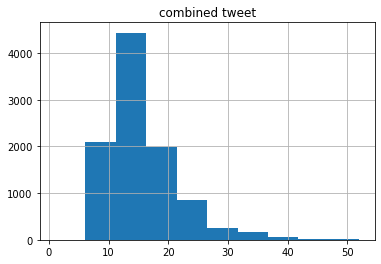

In [19]:
# Combine both the train tweet as well as test tweet for sequencing and vocabulary creation
cdf_tr = pd.DataFrame(train['cleaned_tweet'])
cdf_ts = pd.DataFrame(test['cleaned_tweet'])
cdf    = pd.concat([cdf_tr,cdf_ts],axis=0).reset_index(drop=True)

comb_tweet =[]

for i in cdf['cleaned_tweet'] :
    comb_tweet.append(len(i.split()))
    
sdf = pd.DataFrame({'combined tweet' : comb_tweet})
sdf.hist()


In [ ]:
train['cleaned_tweet'].shape,test['cleaned_tweet'].shape,cdf.shape

In [ ]:
# Nueral Net based Model. Creating the texts to number sequences

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAXLEN = 50

tokens = Tokenizer()
tokens.fit_on_texts(cdf['cleaned_tweet'])
seqc = tokens.texts_to_sequences(cdf['cleaned_tweet'])
seqc = pad_sequences(seqc,maxlen=MAXLEN,padding='post')
seqc = np.array(seqc)
vocab = len(tokens.word_index) +1
vocab,len(seqc)

In [ ]:
seqc

In [ ]:
seqc.shape

In [ ]:
X    = seqc[0:7920,:]
Xtst = seqc[7920:,:]

X.shape,Xtst.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_tr_scale = mms.fit_transform(X)
X_ts_scale = mms.fit_transform(Xtst)

In [ ]:
from sklearn.model_selection import train_test_split

y    = train.label.values

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size =0.25,random_state=11,shuffle=True,stratify=y)  # LSTM / GRU Model
X_train.shape,X_val.shape,y_train.shape,y_val.shape

In [ ]:
# Build the GRU Model here

from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense,LSTM,Embedding,GRU,Dropout
from keras.optimizers import Adam,SGD

MAXLEN = 300
model = Sequential()
model.add(Embedding(2929,300,input_shape=(MAXLEN,)))
#model.add(GRU(512,return_sequences=True,activation='relu'))
#model.add(Dropout(0.4))
model.add(LSTM(50,activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(1,activation = 'sigmoid'))
opt = Adam(lr=0.0002)
model.compile(loss ='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.summary()


In [ ]:
model.fit(X_train,y_train,epochs=15,batch_size=128,validation_data=(X_val,y_val))

In [ ]:
from sklearn.metrics import f1_score
pred = model.predict_classes(X_val)
f1_score(y_val,pred,average='weighted')

In [ ]:
pred = model.predict_classes(Xtst)
pred.shape

In [40]:
df1 = pd.DataFrame(test['id'])

df1.columns = ['id']

pred = pd.DataFrame(pred,columns =['label'])

df2 = pd.DataFrame()
df2 = pd.concat([df1,pred],axis=1)

df2.head()

,id,label
0,7921,1
1,7922,1
2,7923,1
3,7924,1
4,7925,1


In [76]:
df2.to_csv('calg18.csv',index=False)

In [17]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5 MB 6.4 kB/s  eta 0:00:01     |████████████▍                   | 159.5 MB 56.0 MB/s eta 0:00:05
     |████████████████████████████████| 3.8 MB 39.7 MB/s eta 0:00:01     |█████████▋                      | 1.1 MB 39.7 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 48.0 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 5.5 MB/s  eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=b2154273cad3cf4b41f3372b8303dbdc1af9c2835346fd5daee1d9cae7388386
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but y

User BERT pretrained model for Text Classification

In [18]:
!/opt/conda/bin/python3.7 -m pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 1.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


In [19]:
!pip install bert-serving-server
!pip install bert-serving-client

     |████████████████████████████████| 61 kB 203 kB/s eta 0:00:011
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=634278ad774dfd7d2bd22b1162bfb1d32e28d1ee857910147594a90c12a5f9b8
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [20]:
#!unzip uncased_L-12_H-768_A-12.zip

unzip:  cannot find or open uncased_L-12_H-768_A-12.zip, uncased_L-12_H-768_A-12.zip.zip or uncased_L-12_H-768_A-12.zip.ZIP.


In [21]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
#unzip uncased_L-12_H-768_A-12.zip

--2020-08-24 11:00:55--  https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 74.125.31.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M  63.3MB/s    in 8.2s    

2020-08-24 11:01:03 (47.4 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]



In [22]:
!unzip uncased_L-12_H-768_A-12.zip

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [23]:
# Start the BERT server
import subprocess
bert_command = 'bert-serving-start -model_dir /kaggle/working/uncased_L-12_H-768_A-12 -max_seq_len 80'
process = subprocess.Popen(bert_command.split(), stdout=subprocess.PIPE)

In [24]:
# Start the BERT client
from bert_serving.client import BertClient
bc = BertClient()

In [34]:
#test embedding
#test bert embedding
embedding = bc.encode(["I love Machine Learning and Artificial Intelligence"])
# check the shape of embedding, it should be 1x768
print(embedding.shape)

(1, 768)


In [25]:
df = pd.DataFrame(columns = ['cleaned_tweet'])

df['cleaned_tweet'] = pd.concat([train['cleaned_tweet'],test['cleaned_tweet']])

df.shape

(9873, 1)

In [26]:
df

,cleaned_tweet
0,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,im wired i know im george i was made that way iphone cute daventry home
4,what amazing service apple wont even talk to me about a question i have unless i pay them for their stupid support
...,...
1948,samsunggalaxynote explodes burns yearold thanks for rushing your products to market samsung
1949,now available hoodie check it out here iphone case music discount
1950,there goes a crack right across the screen if you could actually provide a more durable screen that would be great apple iphone
1951,codeofinterest as i said adobe big time we may well as include apple to


In [54]:
Xtr_df = df[0:7920]
Xtr_df.shape

(7920, 1)

In [57]:
Xts_df = df[7920:]
Xts_df.shape

(1953, 1)

In [27]:
# get combined bert embedding for train + test topics

df_bert = bc.encode(df['cleaned_tweet'].tolist())
df_bert.shape

(9873, 768)

In [28]:
df_bert

array([[ 0.1752001 ,  0.25515717,  0.7230951 , ..., -0.9216602 ,
        -0.2749294 , -0.65103436],
       [ 0.24970922,  0.12453148,  0.8346863 , ..., -0.18186304,
         0.26947305, -0.12274218],
       [ 0.1389566 , -0.134015  ,  0.7984691 , ..., -0.27632025,
        -0.00769794, -0.16436404],
       ...,
       [-0.15146123, -0.0261295 ,  0.3026182 , ..., -0.68294966,
         0.54733115,  0.05177484],
       [ 0.1039592 , -0.03939817,  0.21227236, ..., -0.54738486,
         0.37029624, -0.15305705],
       [-0.03888084, -0.06971791,  1.0235887 , ..., -0.6419346 ,
         0.24674241, -0.08124954]], dtype=float32)

In [29]:
Xtr_df = df_bert[0:7920]
Xts_df = df_bert[7920:]

Xtr_df.shape,Xts_df.shape

((7920, 768), (1953, 768))

In [55]:
# get bert embedding for train + test topics

Xtr_bert = bc.encode(Xtr_df['cleaned_tweet'].tolist())
Xtr_bert.shape

/opt/conda/lib/python3.7/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=50" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


(7920, 768)

In [56]:
Xtr_bert

array([[ 0.17520013,  0.25515726,  0.7230952 , ..., -0.92165995,
        -0.27492929, -0.6510344 ],
       [ 0.24970925,  0.1245314 ,  0.83468604, ..., -0.1818631 ,
         0.2694731 , -0.12274221],
       [ 0.1389566 , -0.13401498,  0.7984691 , ..., -0.27631995,
        -0.00769795, -0.16436388],
       ...,
       [ 0.07260942,  0.49011815,  0.17358053, ..., -0.25663102,
         0.20545126,  0.2353899 ],
       [ 0.00958163,  0.2266342 ,  0.93244493, ..., -0.8634455 ,
         0.1843494 , -0.20203432],
       [ 0.2714418 , -0.29831433,  0.6794597 , ..., -0.5413263 ,
        -0.21950833, -0.5699635 ]], dtype=float32)

In [58]:
# get bert embedding for train + test topics

Xts_bert = bc.encode(Xts_df['cleaned_tweet'].tolist())
Xts_bert.shape

(1953, 768)

In [59]:
Xts_bert

array([[ 0.14175528,  0.33751985,  0.64900905, ..., -0.39866018,
        -0.17750557,  0.15509541],
       [ 0.0148953 ,  0.7112956 ,  0.63164914, ..., -0.24824947,
        -0.11346451, -0.19992478],
       [-0.07418556, -0.00181214,  0.34946382, ..., -0.57362854,
         0.10209133, -0.0674771 ],
       ...,
       [-0.15146141, -0.02612938,  0.30261812, ..., -0.68294954,
         0.5473311 ,  0.05177506],
       [ 0.10395919, -0.03939811,  0.21227224, ..., -0.5473849 ,
         0.37029627, -0.15305708],
       [-0.03888102, -0.06971809,  1.0235885 , ..., -0.6419345 ,
         0.24674241, -0.08124945]], dtype=float32)

In [33]:
from sklearn.model_selection import train_test_split
y    = train.label.values

X_train,X_val,y_train,y_val = train_test_split(Xtr_df,y,test_size =0.25,random_state=11,shuffle=True,stratify=y)  # bert embedding

X_train.shape,X_val.shape,y_train.shape,y_val.shape,Xts_df.shape

((5940, 768), (1980, 768), (5940,), (1980,), (1953, 768))

In [36]:
# prediction using bert model embedding
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

0.8926846444583851

In [37]:
# LGBM using bert 
import lightgbm as ltb
clf = ltb.LGBMClassifier()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

0.8901800143526413

In [38]:

#catboost using bert 
import catboost as ctb

clf = ctb.CatBoostClassifier()
clf.fit(X_train,y_train)
yhat = clf.predict(X_val)
f1_score(y_val,yhat,average='weighted')

Learning rate set to 0.022047
0:	learn: 0.6741626	total: 331ms	remaining: 5m 30s
1:	learn: 0.6528474	total: 555ms	remaining: 4m 36s
2:	learn: 0.6356909	total: 776ms	remaining: 4m 17s
3:	learn: 0.6159284	total: 1s	remaining: 4m 9s
4:	learn: 0.5993970	total: 1.23s	remaining: 4m 4s
5:	learn: 0.5826081	total: 1.62s	remaining: 4m 28s
6:	learn: 0.5680198	total: 1.96s	remaining: 4m 38s
7:	learn: 0.5544480	total: 2.19s	remaining: 4m 32s
8:	learn: 0.5415041	total: 2.43s	remaining: 4m 27s
9:	learn: 0.5288359	total: 2.66s	remaining: 4m 23s
10:	learn: 0.5160530	total: 2.88s	remaining: 4m 18s
11:	learn: 0.5031934	total: 3.11s	remaining: 4m 16s
12:	learn: 0.4921780	total: 3.35s	remaining: 4m 14s
13:	learn: 0.4801517	total: 3.58s	remaining: 4m 11s
14:	learn: 0.4685338	total: 3.82s	remaining: 4m 10s
15:	learn: 0.4587381	total: 4.04s	remaining: 4m 8s
16:	learn: 0.4503631	total: 4.27s	remaining: 4m 6s
17:	learn: 0.4428676	total: 4.5s	remaining: 4m 5s
18:	learn: 0.4354037	total: 4.73s	remaining: 4m 4s
19

157:	learn: 0.2131016	total: 38.1s	remaining: 3m 23s
158:	learn: 0.2127332	total: 38.3s	remaining: 3m 22s
159:	learn: 0.2121856	total: 38.5s	remaining: 3m 22s
160:	learn: 0.2117618	total: 38.8s	remaining: 3m 22s
161:	learn: 0.2113790	total: 39s	remaining: 3m 21s
162:	learn: 0.2109209	total: 39.2s	remaining: 3m 21s
163:	learn: 0.2104536	total: 39.4s	remaining: 3m 21s
164:	learn: 0.2100806	total: 39.6s	remaining: 3m 20s
165:	learn: 0.2097376	total: 39.9s	remaining: 3m 20s
166:	learn: 0.2093498	total: 40.1s	remaining: 3m 19s
167:	learn: 0.2090345	total: 40.3s	remaining: 3m 19s
168:	learn: 0.2086635	total: 40.5s	remaining: 3m 19s
169:	learn: 0.2082661	total: 40.7s	remaining: 3m 18s
170:	learn: 0.2078978	total: 41s	remaining: 3m 18s
171:	learn: 0.2074645	total: 41.2s	remaining: 3m 18s
172:	learn: 0.2070219	total: 41.4s	remaining: 3m 18s
173:	learn: 0.2066558	total: 41.7s	remaining: 3m 17s
174:	learn: 0.2062320	total: 41.9s	remaining: 3m 17s
175:	learn: 0.2057658	total: 42.1s	remaining: 3m 1

313:	learn: 0.1657016	total: 1m 14s	remaining: 2m 41s
314:	learn: 0.1653406	total: 1m 14s	remaining: 2m 41s
315:	learn: 0.1650932	total: 1m 14s	remaining: 2m 41s
316:	learn: 0.1647358	total: 1m 14s	remaining: 2m 41s
317:	learn: 0.1644355	total: 1m 15s	remaining: 2m 41s
318:	learn: 0.1642632	total: 1m 15s	remaining: 2m 40s
319:	learn: 0.1640996	total: 1m 15s	remaining: 2m 40s
320:	learn: 0.1638952	total: 1m 15s	remaining: 2m 40s
321:	learn: 0.1636414	total: 1m 16s	remaining: 2m 40s
322:	learn: 0.1633532	total: 1m 16s	remaining: 2m 39s
323:	learn: 0.1630739	total: 1m 16s	remaining: 2m 39s
324:	learn: 0.1628957	total: 1m 16s	remaining: 2m 39s
325:	learn: 0.1625783	total: 1m 16s	remaining: 2m 38s
326:	learn: 0.1623430	total: 1m 17s	remaining: 2m 38s
327:	learn: 0.1621431	total: 1m 17s	remaining: 2m 38s
328:	learn: 0.1619646	total: 1m 17s	remaining: 2m 38s
329:	learn: 0.1618042	total: 1m 17s	remaining: 2m 38s
330:	learn: 0.1615603	total: 1m 18s	remaining: 2m 37s
331:	learn: 0.1613396	total:

466:	learn: 0.1312345	total: 1m 49s	remaining: 2m 5s
467:	learn: 0.1309575	total: 1m 50s	remaining: 2m 5s
468:	learn: 0.1306920	total: 1m 50s	remaining: 2m 4s
469:	learn: 0.1304669	total: 1m 50s	remaining: 2m 4s
470:	learn: 0.1302782	total: 1m 50s	remaining: 2m 4s
471:	learn: 0.1300918	total: 1m 51s	remaining: 2m 4s
472:	learn: 0.1298965	total: 1m 51s	remaining: 2m 4s
473:	learn: 0.1296676	total: 1m 51s	remaining: 2m 3s
474:	learn: 0.1294476	total: 1m 51s	remaining: 2m 3s
475:	learn: 0.1292289	total: 1m 52s	remaining: 2m 3s
476:	learn: 0.1290405	total: 1m 52s	remaining: 2m 3s
477:	learn: 0.1287618	total: 1m 52s	remaining: 2m 2s
478:	learn: 0.1285026	total: 1m 52s	remaining: 2m 2s
479:	learn: 0.1282214	total: 1m 53s	remaining: 2m 2s
480:	learn: 0.1280303	total: 1m 53s	remaining: 2m 2s
481:	learn: 0.1278451	total: 1m 53s	remaining: 2m 1s
482:	learn: 0.1276700	total: 1m 53s	remaining: 2m 1s
483:	learn: 0.1274725	total: 1m 53s	remaining: 2m 1s
484:	learn: 0.1271715	total: 1m 54s	remaining:

620:	learn: 0.1004672	total: 2m 25s	remaining: 1m 28s
621:	learn: 0.1003130	total: 2m 25s	remaining: 1m 28s
622:	learn: 0.1001563	total: 2m 25s	remaining: 1m 28s
623:	learn: 0.0999816	total: 2m 26s	remaining: 1m 28s
624:	learn: 0.0998091	total: 2m 26s	remaining: 1m 27s
625:	learn: 0.0996976	total: 2m 26s	remaining: 1m 27s
626:	learn: 0.0995349	total: 2m 26s	remaining: 1m 27s
627:	learn: 0.0993447	total: 2m 26s	remaining: 1m 27s
628:	learn: 0.0991975	total: 2m 27s	remaining: 1m 26s
629:	learn: 0.0990464	total: 2m 27s	remaining: 1m 26s
630:	learn: 0.0988827	total: 2m 27s	remaining: 1m 26s
631:	learn: 0.0986454	total: 2m 27s	remaining: 1m 26s
632:	learn: 0.0984982	total: 2m 28s	remaining: 1m 25s
633:	learn: 0.0983868	total: 2m 28s	remaining: 1m 25s
634:	learn: 0.0982493	total: 2m 28s	remaining: 1m 25s
635:	learn: 0.0980414	total: 2m 28s	remaining: 1m 25s
636:	learn: 0.0978757	total: 2m 28s	remaining: 1m 24s
637:	learn: 0.0976550	total: 2m 29s	remaining: 1m 24s
638:	learn: 0.0974480	total:

774:	learn: 0.0788964	total: 3m	remaining: 52.3s
775:	learn: 0.0786953	total: 3m	remaining: 52.1s
776:	learn: 0.0786072	total: 3m	remaining: 51.9s
777:	learn: 0.0785319	total: 3m	remaining: 51.6s
778:	learn: 0.0784558	total: 3m 1s	remaining: 51.4s
779:	learn: 0.0783393	total: 3m 1s	remaining: 51.1s
780:	learn: 0.0782761	total: 3m 1s	remaining: 50.9s
781:	learn: 0.0781691	total: 3m 1s	remaining: 50.7s
782:	learn: 0.0780174	total: 3m 1s	remaining: 50.4s
783:	learn: 0.0778970	total: 3m 2s	remaining: 50.2s
784:	learn: 0.0776936	total: 3m 2s	remaining: 50s
785:	learn: 0.0775757	total: 3m 2s	remaining: 49.7s
786:	learn: 0.0774790	total: 3m 2s	remaining: 49.5s
787:	learn: 0.0773758	total: 3m 3s	remaining: 49.3s
788:	learn: 0.0772804	total: 3m 3s	remaining: 49.1s
789:	learn: 0.0770898	total: 3m 3s	remaining: 48.8s
790:	learn: 0.0769995	total: 3m 3s	remaining: 48.6s
791:	learn: 0.0768685	total: 3m 4s	remaining: 48.4s
792:	learn: 0.0767914	total: 3m 4s	remaining: 48.1s
793:	learn: 0.0766877	tota

931:	learn: 0.0632950	total: 3m 36s	remaining: 15.8s
932:	learn: 0.0632247	total: 3m 36s	remaining: 15.6s
933:	learn: 0.0631329	total: 3m 36s	remaining: 15.3s
934:	learn: 0.0629986	total: 3m 37s	remaining: 15.1s
935:	learn: 0.0629099	total: 3m 37s	remaining: 14.9s
936:	learn: 0.0628226	total: 3m 37s	remaining: 14.6s
937:	learn: 0.0627010	total: 3m 37s	remaining: 14.4s
938:	learn: 0.0626215	total: 3m 38s	remaining: 14.2s
939:	learn: 0.0624752	total: 3m 38s	remaining: 13.9s
940:	learn: 0.0623482	total: 3m 38s	remaining: 13.7s
941:	learn: 0.0622033	total: 3m 38s	remaining: 13.5s
942:	learn: 0.0620856	total: 3m 38s	remaining: 13.2s
943:	learn: 0.0619984	total: 3m 39s	remaining: 13s
944:	learn: 0.0618806	total: 3m 39s	remaining: 12.8s
945:	learn: 0.0617973	total: 3m 39s	remaining: 12.5s
946:	learn: 0.0617084	total: 3m 39s	remaining: 12.3s
947:	learn: 0.0616540	total: 3m 39s	remaining: 12.1s
948:	learn: 0.0616007	total: 3m 40s	remaining: 11.8s
949:	learn: 0.0614834	total: 3m 40s	remaining: 1

0.8942766470692964

In [39]:
pred= clf.predict(Xts_df)
pred

array([1, 1, 1, ..., 1, 0, 0])

In [88]:
bc.close()